In [120]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

In [121]:
from bml_analysis_io import *
from bml_analysis_func import *
from bml_analysis_plot import *

In [122]:
def base2model(base_list, mode_list):
    return [ a+'_'+m for a in base_list for m in mode_list]

In [123]:
bmol = {}

bmol_acsf_base = [ 'acsf_longrange', 
                   'acsf_minimal', 
                   'acsf_smart']
bmol['acsf'] = base2model(base2model(bmol_acsf_base, ['ext','int']), ['rr','krr'])

bmol_cm_base = ['cm_eigenspectrum', 'cm_sorted_l2' ]
bmol['cm'] = base2model(bmol_cm_base, ['rr','krr'])


bmol_ecfp_base = ['ecfp4', 'ecfp6' ]
bmol['ecfp'] = base2model(bmol_ecfp_base, ['rr','krr'])


bmol_gylm_base = [ 'gylm_minimal', 
                   'gylm_standard']
bmol['gylm'] = base2model(base2model(bmol_gylm_base, ['ext','int']), ['rr','krr'])


bmol_mbtr_base = [ 'mbtr']
bmol['mbtr'] = base2model(base2model(bmol_mbtr_base, ['ext','int']), ['rr','krr'])


bmol_pdf_base = ['pdf_gylm_minimal', 'pdf_gylm_standard', 'pdf_soap_minimal','pdf_soap_standard']
bmol['pdf'] = base2model(bmol_pdf_base, ['rr','krr'])

bmol_physchem_base = ['physchem_basic', 'physchem_core', 'physchem_extended','physchem_logp']
bmol['physchem'] = base2model(bmol_physchem_base, ['rr','rf'])

bmol_soap_base = [ 'soap_longrange', 
                   'soap_minimal', 
                   'soap_smart']
bmol['soap'] = base2model(base2model(base2model(bmol_soap_base,['cross','nocross']), ['ext','int']), ['rr','krr'])

## parse

In [124]:
prefix = 'aqsol'
file_prefix = 'benchmark_'+prefix

In [125]:
by_model = parse(file_prefix+'.json.gz')

In [126]:
all_model_keys = list(by_model.keys())
print(all_model_keys)

['bmol_acsf_longrange_ext_krr', 'bmol_acsf_longrange_ext_rr', 'bmol_acsf_longrange_int_krr', 'bmol_acsf_longrange_int_rr', 'bmol_acsf_minimal_ext_krr', 'bmol_acsf_minimal_ext_rr', 'bmol_acsf_minimal_int_krr', 'bmol_acsf_minimal_int_rr', 'bmol_acsf_smart_ext_krr', 'bmol_acsf_smart_ext_rr', 'bmol_acsf_smart_int_krr', 'bmol_acsf_smart_int_rr', 'bmol_cm_eigenspectrum_krr', 'bmol_cm_eigenspectrum_rr', 'bmol_cm_sorted_l2_krr', 'bmol_cm_sorted_l2_rr', 'bmol_ecfp4_krr', 'bmol_ecfp4_rr', 'bmol_ecfp6_krr', 'bmol_ecfp6_rr', 'bmol_gylm_minimal_ext_krr', 'bmol_gylm_minimal_ext_rr', 'bmol_gylm_minimal_int_krr', 'bmol_gylm_minimal_int_rr', 'bmol_gylm_standard_ext_krr', 'bmol_gylm_standard_ext_rr', 'bmol_gylm_standard_int_krr', 'bmol_gylm_standard_int_rr', 'bmol_mbtr_ext_krr', 'bmol_mbtr_ext_rr', 'bmol_mbtr_int_krr', 'bmol_mbtr_int_rr', 'bmol_pdf_gylm_minimal_krr', 'bmol_pdf_gylm_minimal_rr', 'bmol_pdf_gylm_standard_krr', 'bmol_pdf_gylm_standard_rr', 'bmol_pdf_soap_minimal_krr', 'bmol_pdf_soap_minimal

In [127]:
train_fraction_keys = list(by_model[all_model_keys[0]].keys())
print(train_fraction_keys)
max_train_frac = train_fraction_keys[-1]

['5:1755', '10:1750', '21:1739', '42:1718', '84:1676', '168:1592', '337:1423', '675:1085', '1351:409']


## LC

/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/numpy-1.19.0rc1-py3.7-macosx-10.9-x86_64.egg/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/numpy-1.19.0rc1-py3.7-macosx-10.9-x86_64.egg/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/scipy-1.4.1-py3.7-macosx-10.9-x86_64.egg/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/tc/miniconda/envs/chicken/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/Users/tc/minicon

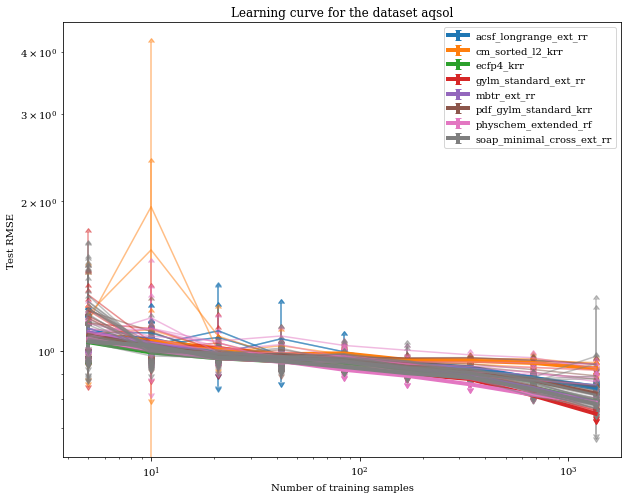

In [128]:
fig, ax = plt.subplots(figsize=(10,8))
lc_by_model = {}
lc_by_model_train = {}
sc_name='RMSE'

i=0
for category, model_key in bmol.items():
    #print(category, model_key)
    best_error = 10**20.
    best_model = None
    for key_now in model_key:
        lc_by_model[key_now], lc_by_model_train[key_now], _ = get_learning_curve(by_model, model_key_now='bmol_'+key_now, 
                                                       sc_name=sc_name)
        #ax.errorbar(lc_by_model_train[key_now][:,0], lc_by_model_train[key_now][:,1], yerr=lc_by_model_train[key_now][:,2],
        #            linestyle='--', c=cm.tab10(i), alpha=0.5,
        #            uplims=True, lolims=True)
        ax.errorbar(lc_by_model[key_now][:,0], lc_by_model[key_now][:,1], yerr=lc_by_model[key_now][:,2],
                    linestyle='-', c=cm.tab10(i), alpha=0.5,
                    uplims=True, lolims=True)
        if np.mean(lc_by_model[key_now][:,1]) < best_error:
            best_error, best_model = np.mean(lc_by_model[key_now][:,1]), key_now
    ax.errorbar(lc_by_model[best_model][:,0], lc_by_model[best_model][:,1], yerr=lc_by_model[best_model][:,2],
                linestyle='-',linewidth=4, c=cm.tab10(i), alpha=1.0, label=best_model,
                uplims=True, lolims=True)    
    i+=1

ax.legend(loc='best') # bbox_to_anchor=(1.3, 0.5))
ax.set_title('Learning curve for the dataset '+prefix)
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Test {}'.format(sc_name))

#plt.ylim([0.1,0.7])
ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig(file_prefix+'-lc.pdf')

## model correlation matix

In [129]:
try:
    correlation_matrix = np.genfromtxt(prefix+'-model-y.kmat')
    model_list = np.genfromtxt(prefix+'-model-y.kmat', dtype='str')
except:
    correlation_matrix, model_list = model_correlation_matrix(by_model, max_train_frac, 'test', 'y', 
                                                              "SpearmanR", replica=None, verbose=True)
    np.savetxt(prefix+'-model-y.kmat', correlation_matrix, fmt='%.8e')
    np.savetxt(prefix+'-model-y.names', model_list, fmt='%s')

bmol_acsf_longrange_ext_rr bmol_acsf_longrange_ext_krr 0.9810485588403497
bmol_acsf_longrange_int_krr bmol_acsf_longrange_ext_krr 0.9996183281467628
bmol_acsf_longrange_int_krr bmol_acsf_longrange_ext_rr 0.9809699336088934
bmol_acsf_longrange_int_rr bmol_acsf_longrange_ext_krr 0.9810188664423586
bmol_acsf_longrange_int_rr bmol_acsf_longrange_ext_rr 0.9999690109982226
bmol_acsf_longrange_int_rr bmol_acsf_longrange_int_krr 0.9809454341347592
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_ext_krr 0.7521110307274811
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_ext_rr 0.7562205885096349
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_int_krr 0.7523378915142558
bmol_acsf_minimal_ext_krr bmol_acsf_longrange_int_rr 0.7564373960780951
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_ext_krr 0.7583183923797778
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_ext_rr 0.769011388231205
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_int_krr 0.7584451594650049
bmol_acsf_minimal_ext_rr bmol_acsf_longrange_int_rr 

bmol_ecfp4_krr bmol_acsf_minimal_ext_rr 0.5453738076167247
bmol_ecfp4_krr bmol_acsf_minimal_int_krr 0.5185417276311848
bmol_ecfp4_krr bmol_acsf_minimal_int_rr 0.5453469328989164
bmol_ecfp4_krr bmol_acsf_smart_ext_krr 0.5279188477633108
bmol_ecfp4_krr bmol_acsf_smart_ext_rr 0.5642208380489572
bmol_ecfp4_krr bmol_acsf_smart_int_krr 0.5280966071756065
bmol_ecfp4_krr bmol_acsf_smart_int_rr 0.565865428959315
bmol_ecfp4_krr bmol_cm_eigenspectrum_krr 0.1396782826787217
bmol_ecfp4_krr bmol_cm_eigenspectrum_rr 0.2281543839860333
bmol_ecfp4_krr bmol_cm_sorted_l2_krr 0.3209707744986122
bmol_ecfp4_krr bmol_cm_sorted_l2_rr 0.38931102832663605
bmol_ecfp4_rr bmol_acsf_longrange_ext_krr 0.6100647027668682
bmol_ecfp4_rr bmol_acsf_longrange_ext_rr 0.6165337579569949
bmol_ecfp4_rr bmol_acsf_longrange_int_krr 0.6111316865889193
bmol_ecfp4_rr bmol_acsf_longrange_int_rr 0.6167772553526742
bmol_ecfp4_rr bmol_acsf_minimal_ext_krr 0.594574181239324
bmol_ecfp4_rr bmol_acsf_minimal_ext_rr 0.6117228798521419
bmol

bmol_gylm_minimal_int_rr bmol_acsf_minimal_ext_krr 0.7322414070472296
bmol_gylm_minimal_int_rr bmol_acsf_minimal_ext_rr 0.7684622571727987
bmol_gylm_minimal_int_rr bmol_acsf_minimal_int_krr 0.7321101869758413
bmol_gylm_minimal_int_rr bmol_acsf_minimal_int_rr 0.7684345909997143
bmol_gylm_minimal_int_rr bmol_acsf_smart_ext_krr 0.7844199299412774
bmol_gylm_minimal_int_rr bmol_acsf_smart_ext_rr 0.8385705198530633
bmol_gylm_minimal_int_rr bmol_acsf_smart_int_krr 0.7837513619767252
bmol_gylm_minimal_int_rr bmol_acsf_smart_int_rr 0.8382266370909345
bmol_gylm_minimal_int_rr bmol_cm_eigenspectrum_krr 0.12999137555513002
bmol_gylm_minimal_int_rr bmol_cm_eigenspectrum_rr 0.23316726428040127
bmol_gylm_minimal_int_rr bmol_cm_sorted_l2_krr 0.3123098838105211
bmol_gylm_minimal_int_rr bmol_cm_sorted_l2_rr 0.4039897099707922
bmol_gylm_minimal_int_rr bmol_ecfp4_krr 0.640888807605591
bmol_gylm_minimal_int_rr bmol_ecfp4_rr 0.6773931926788832
bmol_gylm_minimal_int_rr bmol_ecfp6_krr 0.6279096598010572
bmol_

bmol_mbtr_ext_krr bmol_acsf_minimal_ext_rr 0.756526792198918
bmol_mbtr_ext_krr bmol_acsf_minimal_int_krr 0.7381134056414439
bmol_mbtr_ext_krr bmol_acsf_minimal_int_rr 0.7565070418155992
bmol_mbtr_ext_krr bmol_acsf_smart_ext_krr 0.8127128817129717
bmol_mbtr_ext_krr bmol_acsf_smart_ext_rr 0.8289908645740245
bmol_mbtr_ext_krr bmol_acsf_smart_int_krr 0.8119784359991564
bmol_mbtr_ext_krr bmol_acsf_smart_int_rr 0.830481877770105
bmol_mbtr_ext_krr bmol_cm_eigenspectrum_krr 0.1528983520122198
bmol_mbtr_ext_krr bmol_cm_eigenspectrum_rr 0.26526952253265257
bmol_mbtr_ext_krr bmol_cm_sorted_l2_krr 0.34712200526671383
bmol_mbtr_ext_krr bmol_cm_sorted_l2_rr 0.4519102720136949
bmol_mbtr_ext_krr bmol_ecfp4_krr 0.6304879881226045
bmol_mbtr_ext_krr bmol_ecfp4_rr 0.6708660888625589
bmol_mbtr_ext_krr bmol_ecfp6_krr 0.6167247715032932
bmol_mbtr_ext_krr bmol_ecfp6_rr 0.6450757505466804
bmol_mbtr_ext_krr bmol_gylm_minimal_ext_krr 0.7704290259559774
bmol_mbtr_ext_krr bmol_gylm_minimal_ext_rr 0.792518261981345

bmol_pdf_gylm_minimal_rr bmol_acsf_smart_int_rr 0.737846200094368
bmol_pdf_gylm_minimal_rr bmol_cm_eigenspectrum_krr 0.1489645410799916
bmol_pdf_gylm_minimal_rr bmol_cm_eigenspectrum_rr 0.2795083272275699
bmol_pdf_gylm_minimal_rr bmol_cm_sorted_l2_krr 0.37554038641219906
bmol_pdf_gylm_minimal_rr bmol_cm_sorted_l2_rr 0.4942653392375098
bmol_pdf_gylm_minimal_rr bmol_ecfp4_krr 0.5421098746063923
bmol_pdf_gylm_minimal_rr bmol_ecfp4_rr 0.5972847311176377
bmol_pdf_gylm_minimal_rr bmol_ecfp6_krr 0.5384955704769205
bmol_pdf_gylm_minimal_rr bmol_ecfp6_rr 0.5767625796373501
bmol_pdf_gylm_minimal_rr bmol_gylm_minimal_ext_krr 0.6322737425814599
bmol_pdf_gylm_minimal_rr bmol_gylm_minimal_ext_rr 0.6310030965630367
bmol_pdf_gylm_minimal_rr bmol_gylm_minimal_int_krr 0.6659562131471687
bmol_pdf_gylm_minimal_rr bmol_gylm_minimal_int_rr 0.6678805643168068
bmol_pdf_gylm_minimal_rr bmol_gylm_standard_ext_krr 0.6389200726143682
bmol_pdf_gylm_minimal_rr bmol_gylm_standard_ext_rr 0.6335647704577655
bmol_pdf_g

bmol_pdf_soap_minimal_rr bmol_ecfp6_krr 0.19078894050232853
bmol_pdf_soap_minimal_rr bmol_ecfp6_rr 0.24979807710425941
bmol_pdf_soap_minimal_rr bmol_gylm_minimal_ext_krr 0.23893820665078738
bmol_pdf_soap_minimal_rr bmol_gylm_minimal_ext_rr 0.26881697457524734
bmol_pdf_soap_minimal_rr bmol_gylm_minimal_int_krr 0.2693145951794365
bmol_pdf_soap_minimal_rr bmol_gylm_minimal_int_rr 0.2717552411315276
bmol_pdf_soap_minimal_rr bmol_gylm_standard_ext_krr 0.2728779199937135
bmol_pdf_soap_minimal_rr bmol_gylm_standard_ext_rr 0.2891804421011708
bmol_pdf_soap_minimal_rr bmol_gylm_standard_int_krr 0.2817040825020817
bmol_pdf_soap_minimal_rr bmol_gylm_standard_int_rr 0.2887041808605265
bmol_pdf_soap_minimal_rr bmol_mbtr_ext_krr 0.29219622312598087
bmol_pdf_soap_minimal_rr bmol_mbtr_ext_rr 0.29193102431725027
bmol_pdf_soap_minimal_rr bmol_mbtr_int_krr 0.29219622312598087
bmol_pdf_soap_minimal_rr bmol_mbtr_int_rr 0.29193102431725027
bmol_pdf_soap_minimal_rr bmol_pdf_gylm_minimal_krr 0.3382123602631066

bmol_physchem_basic_rr bmol_ecfp6_rr 0.09733046713143541
bmol_physchem_basic_rr bmol_gylm_minimal_ext_krr 0.18655547218624396
bmol_physchem_basic_rr bmol_gylm_minimal_ext_rr 0.27482566816219084
bmol_physchem_basic_rr bmol_gylm_minimal_int_krr 0.21240269364813522
bmol_physchem_basic_rr bmol_gylm_minimal_int_rr 0.217137162754579
bmol_physchem_basic_rr bmol_gylm_standard_ext_krr 0.22183027739384412
bmol_physchem_basic_rr bmol_gylm_standard_ext_rr 0.2681824499413894
bmol_physchem_basic_rr bmol_gylm_standard_int_krr 0.20992169384482892
bmol_physchem_basic_rr bmol_gylm_standard_int_rr 0.22153799515109152
bmol_physchem_basic_rr bmol_mbtr_ext_krr 0.21321544156031677
bmol_physchem_basic_rr bmol_mbtr_ext_rr 0.2125512638890626
bmol_physchem_basic_rr bmol_mbtr_int_krr 0.21321544156031677
bmol_physchem_basic_rr bmol_mbtr_int_rr 0.2125512638890626
bmol_physchem_basic_rr bmol_pdf_gylm_minimal_krr 0.17631561566427473
bmol_physchem_basic_rr bmol_pdf_gylm_minimal_rr 0.18321503542958092
bmol_physchem_bas

bmol_physchem_extended_rr bmol_acsf_minimal_int_krr 0.6924519888351436
bmol_physchem_extended_rr bmol_acsf_minimal_int_rr 0.6895519452191221
bmol_physchem_extended_rr bmol_acsf_smart_ext_krr 0.6973380574695712
bmol_physchem_extended_rr bmol_acsf_smart_ext_rr 0.6673810952422908
bmol_physchem_extended_rr bmol_acsf_smart_int_krr 0.6973610311648798
bmol_physchem_extended_rr bmol_acsf_smart_int_rr 0.66963065629065
bmol_physchem_extended_rr bmol_cm_eigenspectrum_krr 0.1710024699116121
bmol_physchem_extended_rr bmol_cm_eigenspectrum_rr 0.3074188097353862
bmol_physchem_extended_rr bmol_cm_sorted_l2_krr 0.3549415179512823
bmol_physchem_extended_rr bmol_cm_sorted_l2_rr 0.4864338669909754
bmol_physchem_extended_rr bmol_ecfp4_krr 0.4726819012298285
bmol_physchem_extended_rr bmol_ecfp4_rr 0.5479903751425155
bmol_physchem_extended_rr bmol_ecfp6_krr 0.4605207472985189
bmol_physchem_extended_rr bmol_ecfp6_rr 0.5234380014651575
bmol_physchem_extended_rr bmol_gylm_minimal_ext_krr 0.5869733687990669
bmol

bmol_soap_longrange_cross_ext_krr bmol_pdf_gylm_standard_rr 0.7252658859272877
bmol_soap_longrange_cross_ext_krr bmol_pdf_soap_minimal_krr 0.3254574178836504
bmol_soap_longrange_cross_ext_krr bmol_pdf_soap_minimal_rr 0.311360787758828
bmol_soap_longrange_cross_ext_krr bmol_pdf_soap_standard_krr 0.5387438299890581
bmol_soap_longrange_cross_ext_krr bmol_pdf_soap_standard_rr 0.5120449486046856
bmol_soap_longrange_cross_ext_krr bmol_physchem_basic_rf 0.3570113179174153
bmol_soap_longrange_cross_ext_krr bmol_physchem_basic_rr 0.2433288731747189
bmol_soap_longrange_cross_ext_krr bmol_physchem_core_rf 0.4908421417367768
bmol_soap_longrange_cross_ext_krr bmol_physchem_core_rr 0.42268549417281076
bmol_soap_longrange_cross_ext_krr bmol_physchem_extended_rf 0.6887596842639383
bmol_soap_longrange_cross_ext_krr bmol_physchem_extended_rr 0.6404379327782077
bmol_soap_longrange_cross_ext_krr bmol_physchem_logp_rf 0.6669095525869905
bmol_soap_longrange_cross_ext_krr bmol_physchem_logp_rr 0.520834303129

bmol_soap_longrange_cross_int_rr bmol_gylm_standard_int_rr 0.8394147735475622
bmol_soap_longrange_cross_int_rr bmol_mbtr_ext_krr 0.8196684341069114
bmol_soap_longrange_cross_int_rr bmol_mbtr_ext_rr 0.819533327992365
bmol_soap_longrange_cross_int_rr bmol_mbtr_int_krr 0.8196684341069114
bmol_soap_longrange_cross_int_rr bmol_mbtr_int_rr 0.819533327992365
bmol_soap_longrange_cross_int_rr bmol_pdf_gylm_minimal_krr 0.7265358118767126
bmol_soap_longrange_cross_int_rr bmol_pdf_gylm_minimal_rr 0.7133077076066552
bmol_soap_longrange_cross_int_rr bmol_pdf_gylm_standard_krr 0.7667155948469744
bmol_soap_longrange_cross_int_rr bmol_pdf_gylm_standard_rr 0.7647209927592652
bmol_soap_longrange_cross_int_rr bmol_pdf_soap_minimal_krr 0.3503565986620242
bmol_soap_longrange_cross_int_rr bmol_pdf_soap_minimal_rr 0.3327629332338358
bmol_soap_longrange_cross_int_rr bmol_pdf_soap_standard_krr 0.5565943784848749
bmol_soap_longrange_cross_int_rr bmol_pdf_soap_standard_rr 0.5304391673502006
bmol_soap_longrange_cr

bmol_soap_longrange_nocross_int_krr bmol_acsf_longrange_ext_rr 0.7290112806319315
bmol_soap_longrange_nocross_int_krr bmol_acsf_longrange_int_krr 0.7149327902900896
bmol_soap_longrange_nocross_int_krr bmol_acsf_longrange_int_rr 0.7290700539516237
bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_ext_krr 0.633985149959152
bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_ext_rr 0.645845392387286
bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_int_krr 0.6344111334608931
bmol_soap_longrange_nocross_int_krr bmol_acsf_minimal_int_rr 0.6458539384357319
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_ext_krr 0.6808190326506921
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_ext_rr 0.6953218384992
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_int_krr 0.6815366667060073
bmol_soap_longrange_nocross_int_krr bmol_acsf_smart_int_rr 0.6958178468791244
bmol_soap_longrange_nocross_int_krr bmol_cm_eigenspectrum_krr 0.21974572830692438
bmol_soap_longrange_nocross_int_krr bmol

bmol_soap_minimal_cross_ext_krr bmol_gylm_standard_int_krr 0.8605395614202066
bmol_soap_minimal_cross_ext_krr bmol_gylm_standard_int_rr 0.8678052878172696
bmol_soap_minimal_cross_ext_krr bmol_mbtr_ext_krr 0.8120365101462386
bmol_soap_minimal_cross_ext_krr bmol_mbtr_ext_rr 0.8116546173393838
bmol_soap_minimal_cross_ext_krr bmol_mbtr_int_krr 0.8120365101462386
bmol_soap_minimal_cross_ext_krr bmol_mbtr_int_rr 0.8116546173393838
bmol_soap_minimal_cross_ext_krr bmol_pdf_gylm_minimal_krr 0.6597051564611148
bmol_soap_minimal_cross_ext_krr bmol_pdf_gylm_minimal_rr 0.6502650649090348
bmol_soap_minimal_cross_ext_krr bmol_pdf_gylm_standard_krr 0.692099016622888
bmol_soap_minimal_cross_ext_krr bmol_pdf_gylm_standard_rr 0.6909186642423077
bmol_soap_minimal_cross_ext_krr bmol_pdf_soap_minimal_krr 0.2551488644655853
bmol_soap_minimal_cross_ext_krr bmol_pdf_soap_minimal_rr 0.24269088220661825
bmol_soap_minimal_cross_ext_krr bmol_pdf_soap_standard_krr 0.4702842514078465
bmol_soap_minimal_cross_ext_krr 

bmol_soap_minimal_cross_int_krr bmol_soap_longrange_cross_ext_krr 0.7872195088780188
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_cross_ext_rr 0.786284901795953
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_cross_int_krr 0.8003166804876725
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_cross_int_rr 0.7930723050613353
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_nocross_ext_krr 0.7143068608926956
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_nocross_ext_rr 0.7245392777294642
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_nocross_int_krr 0.7386076035197738
bmol_soap_minimal_cross_int_krr bmol_soap_longrange_nocross_int_rr 0.7368987674255746
bmol_soap_minimal_cross_int_krr bmol_soap_minimal_cross_ext_krr 0.9004887750085572
bmol_soap_minimal_cross_int_krr bmol_soap_minimal_cross_ext_rr 0.8857336462428222
bmol_soap_minimal_cross_int_rr bmol_acsf_longrange_ext_krr 0.7824526181945581
bmol_soap_minimal_cross_int_rr bmol_acsf_longrange_ext_rr 0.80149481956387

bmol_soap_minimal_nocross_ext_rr bmol_acsf_minimal_ext_krr 0.6641214489063615
bmol_soap_minimal_nocross_ext_rr bmol_acsf_minimal_ext_rr 0.6950516609212318
bmol_soap_minimal_nocross_ext_rr bmol_acsf_minimal_int_krr 0.6643151166362035
bmol_soap_minimal_nocross_ext_rr bmol_acsf_minimal_int_rr 0.695038603880458
bmol_soap_minimal_nocross_ext_rr bmol_acsf_smart_ext_krr 0.6802198728973907
bmol_soap_minimal_nocross_ext_rr bmol_acsf_smart_ext_rr 0.7249207801378122
bmol_soap_minimal_nocross_ext_rr bmol_acsf_smart_int_krr 0.6795278252709824
bmol_soap_minimal_nocross_ext_rr bmol_acsf_smart_int_rr 0.7248753098145468
bmol_soap_minimal_nocross_ext_rr bmol_cm_eigenspectrum_krr 0.15385929436754572
bmol_soap_minimal_nocross_ext_rr bmol_cm_eigenspectrum_rr 0.26734457366121256
bmol_soap_minimal_nocross_ext_rr bmol_cm_sorted_l2_krr 0.34379501141524754
bmol_soap_minimal_nocross_ext_rr bmol_cm_sorted_l2_rr 0.42749671423772084
bmol_soap_minimal_nocross_ext_rr bmol_ecfp4_krr 0.610771297535512
bmol_soap_minimal

bmol_soap_minimal_nocross_int_rr bmol_acsf_minimal_int_krr 0.729982234070231
bmol_soap_minimal_nocross_int_rr bmol_acsf_minimal_int_rr 0.7383279554987028
bmol_soap_minimal_nocross_int_rr bmol_acsf_smart_ext_krr 0.7397842318898488
bmol_soap_minimal_nocross_int_rr bmol_acsf_smart_ext_rr 0.7612778565676112
bmol_soap_minimal_nocross_int_rr bmol_acsf_smart_int_krr 0.7388061565512271
bmol_soap_minimal_nocross_int_rr bmol_acsf_smart_int_rr 0.762025131848526
bmol_soap_minimal_nocross_int_rr bmol_cm_eigenspectrum_krr 0.1050001175892886
bmol_soap_minimal_nocross_int_rr bmol_cm_eigenspectrum_rr 0.20977184775645916
bmol_soap_minimal_nocross_int_rr bmol_cm_sorted_l2_krr 0.3103200111579179
bmol_soap_minimal_nocross_int_rr bmol_cm_sorted_l2_rr 0.38646672264369564
bmol_soap_minimal_nocross_int_rr bmol_ecfp4_krr 0.5772397503855223
bmol_soap_minimal_nocross_int_rr bmol_ecfp4_rr 0.6251115036973317
bmol_soap_minimal_nocross_int_rr bmol_ecfp6_krr 0.5680765236324732
bmol_soap_minimal_nocross_int_rr bmol_ecf

bmol_soap_smart_cross_ext_rr bmol_cm_eigenspectrum_krr 0.18446536468502905
bmol_soap_smart_cross_ext_rr bmol_cm_eigenspectrum_rr 0.30237406688835866
bmol_soap_smart_cross_ext_rr bmol_cm_sorted_l2_krr 0.35768780925386623
bmol_soap_smart_cross_ext_rr bmol_cm_sorted_l2_rr 0.4526104918408771
bmol_soap_smart_cross_ext_rr bmol_ecfp4_krr 0.6619981493204151
bmol_soap_smart_cross_ext_rr bmol_ecfp4_rr 0.6824149477177234
bmol_soap_smart_cross_ext_rr bmol_ecfp6_krr 0.6522940822357254
bmol_soap_smart_cross_ext_rr bmol_ecfp6_rr 0.6686859052579865
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_ext_krr 0.7791855863589896
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_ext_rr 0.8098774168256742
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_int_krr 0.790165027850403
bmol_soap_smart_cross_ext_rr bmol_gylm_minimal_int_rr 0.7928233828266212
bmol_soap_smart_cross_ext_rr bmol_gylm_standard_ext_krr 0.8857604237658812
bmol_soap_smart_cross_ext_rr bmol_gylm_standard_ext_rr 0.9061561106043077
bmol_soap_smart_cro

bmol_soap_smart_cross_int_rr bmol_cm_sorted_l2_rr 0.434273276388168
bmol_soap_smart_cross_int_rr bmol_ecfp4_krr 0.6709693134256856
bmol_soap_smart_cross_int_rr bmol_ecfp4_rr 0.6821548234766532
bmol_soap_smart_cross_int_rr bmol_ecfp6_krr 0.6610860810470751
bmol_soap_smart_cross_int_rr bmol_ecfp6_rr 0.6676361328663636
bmol_soap_smart_cross_int_rr bmol_gylm_minimal_ext_krr 0.7841572417823474
bmol_soap_smart_cross_int_rr bmol_gylm_minimal_ext_rr 0.8048506185732264
bmol_soap_smart_cross_int_rr bmol_gylm_minimal_int_krr 0.817839991194947
bmol_soap_smart_cross_int_rr bmol_gylm_minimal_int_rr 0.819216293465059
bmol_soap_smart_cross_int_rr bmol_gylm_standard_ext_krr 0.9003361895787657
bmol_soap_smart_cross_int_rr bmol_gylm_standard_ext_rr 0.8990244458449232
bmol_soap_smart_cross_int_rr bmol_gylm_standard_int_krr 0.8963691972367723
bmol_soap_smart_cross_int_rr bmol_gylm_standard_int_rr 0.9046767398090598
bmol_soap_smart_cross_int_rr bmol_mbtr_ext_krr 0.8263159100155569
bmol_soap_smart_cross_int_

bmol_soap_smart_nocross_ext_rr bmol_ecfp6_krr 0.6133212538709791
bmol_soap_smart_nocross_ext_rr bmol_ecfp6_rr 0.6422178636574694
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_ext_krr 0.7407618899858254
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_ext_rr 0.7662726294325503
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_int_krr 0.7442520466079323
bmol_soap_smart_nocross_ext_rr bmol_gylm_minimal_int_rr 0.7483130326188113
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_ext_krr 0.8093021272569019
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_ext_rr 0.8237663577390534
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_int_krr 0.794592468005139
bmol_soap_smart_nocross_ext_rr bmol_gylm_standard_int_rr 0.8013002382165182
bmol_soap_smart_nocross_ext_rr bmol_mbtr_ext_krr 0.7402488418521307
bmol_soap_smart_nocross_ext_rr bmol_mbtr_ext_rr 0.7403328467046866
bmol_soap_smart_nocross_ext_rr bmol_mbtr_int_krr 0.7402488418521307
bmol_soap_smart_nocross_ext_rr bmol_mbtr_int_rr 0.74033284670

bmol_soap_smart_nocross_int_rr bmol_acsf_smart_int_rr 0.7496180699821581
bmol_soap_smart_nocross_int_rr bmol_cm_eigenspectrum_krr 0.1567153514468671
bmol_soap_smart_nocross_int_rr bmol_cm_eigenspectrum_rr 0.28284530372921857
bmol_soap_smart_nocross_int_rr bmol_cm_sorted_l2_krr 0.3564424923989751
bmol_soap_smart_nocross_int_rr bmol_cm_sorted_l2_rr 0.4533656102491971
bmol_soap_smart_nocross_int_rr bmol_ecfp4_krr 0.5952806496019445
bmol_soap_smart_nocross_int_rr bmol_ecfp4_rr 0.647206784988684
bmol_soap_smart_nocross_int_rr bmol_ecfp6_krr 0.5873536227146305
bmol_soap_smart_nocross_int_rr bmol_ecfp6_rr 0.6311537232575533
bmol_soap_smart_nocross_int_rr bmol_gylm_minimal_ext_krr 0.72302893540319
bmol_soap_smart_nocross_int_rr bmol_gylm_minimal_ext_rr 0.7344867836118384
bmol_soap_smart_nocross_int_rr bmol_gylm_minimal_int_krr 0.7544935430968436
bmol_soap_smart_nocross_int_rr bmol_gylm_minimal_int_rr 0.7571897294431433
bmol_soap_smart_nocross_int_rr bmol_gylm_standard_ext_krr 0.789329347012631

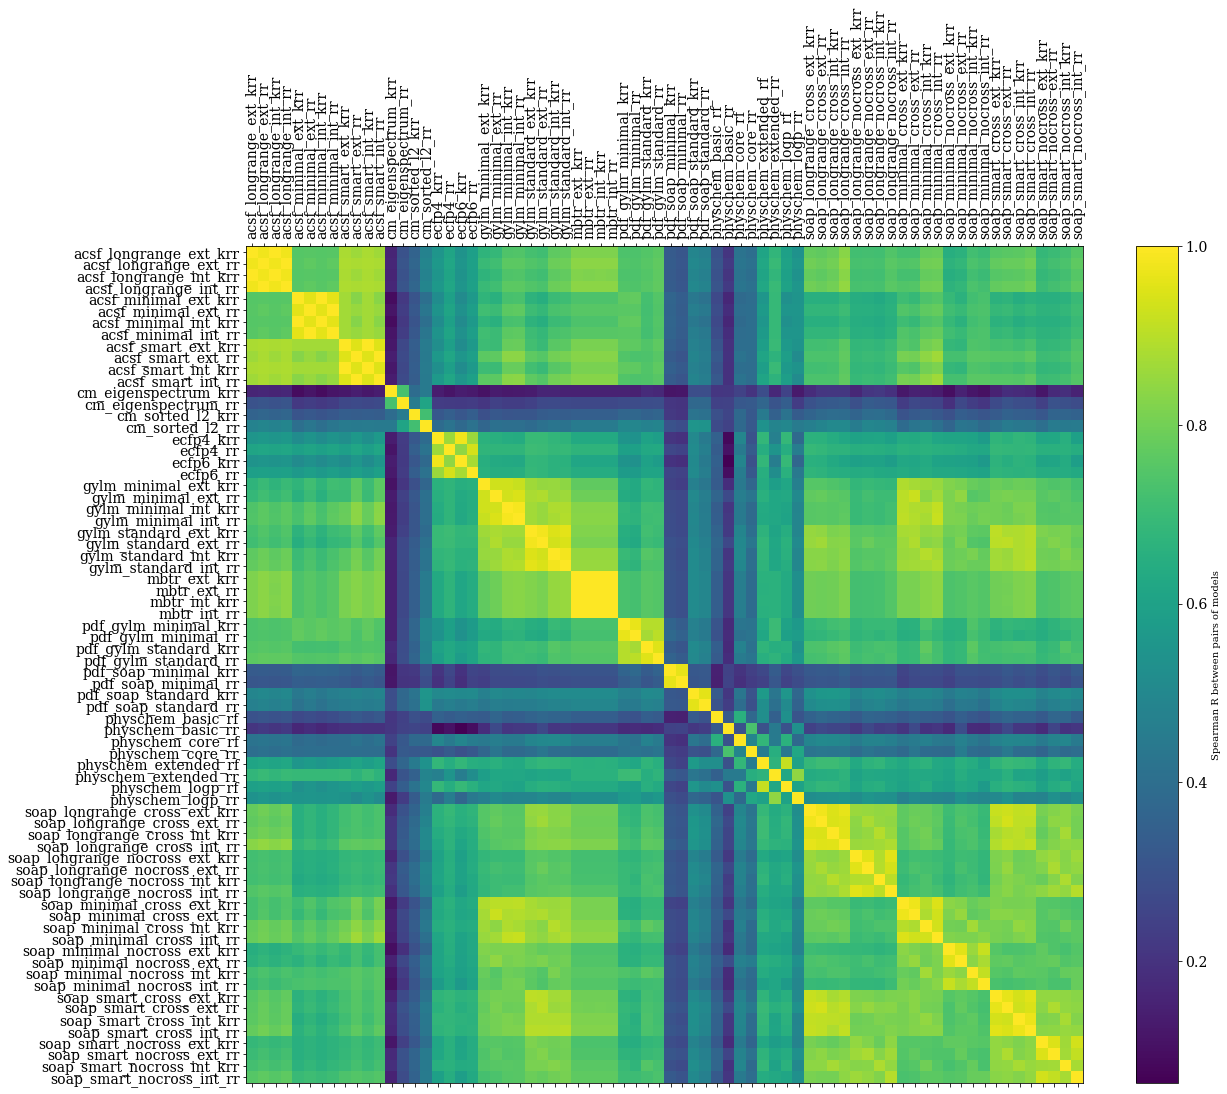

In [130]:
f = plt.figure(figsize=(19, 15))
pmat = plt.matshow(correlation_matrix, fignum=f.number, cmap='viridis')

annotate = list([ x[5:] for x in by_model.keys()])
plt.xticks(range(correlation_matrix.shape[1]), annotate, fontsize=14, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), annotate, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
cb.set_label('Spearman R between pairs of models')
#plt.title('Correlation Matrix', fontsize=16);

f.savefig(file_prefix+'-model-Rmatrix.pdf')

## KPCA this correlation matrix

In [131]:
from asaplib.reducedim import Dimension_Reducers

reduce_dict = {}
reduce_dict['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}
dreducer = Dimension_Reducers(reduce_dict)

Using kernel PCA (sparsified) ...


In [132]:
proj = dreducer.fit_transform(np.clip((correlation_matrix),0,1))

Not using any sparsification


# Visualizations

In [133]:
from asaplib.plot import Plotters

Using scatter plot ...
Using annotation plot ...


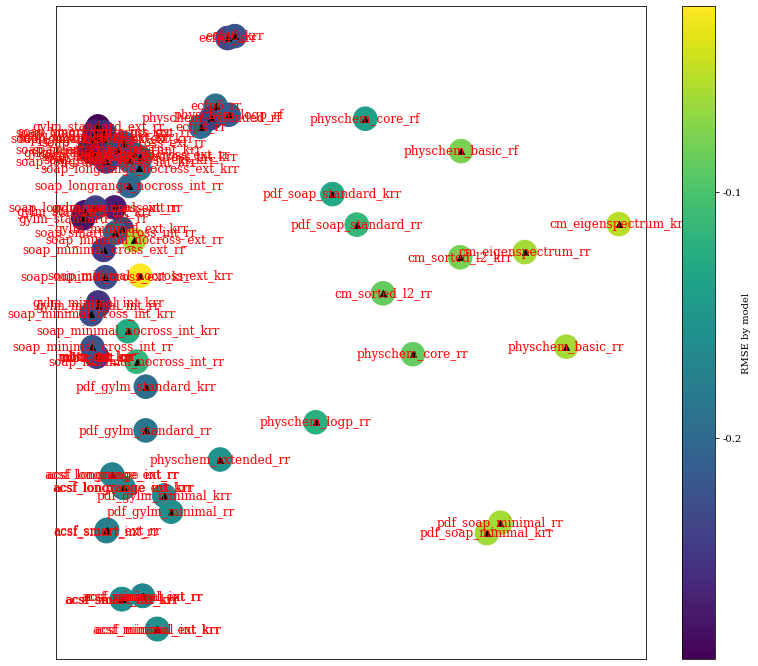

In [134]:
fig_spec = { 'outfile': file_prefix+'-model-kpca.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': False} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)

plotcolor = [ np.log(lc_by_model[k[5:]][-1,1]) for k in by_model.keys()]
annotate = list([ x[5:] for x in by_model.keys()])
asap_plot.plot(proj[:, [0,1]], plotcolor, [], annotate)

# kernel matrix of descriptors

In [135]:
# note that we clip the min
desc_kmat = np.clip(np.loadtxt(prefix+"-descriptors-spearman.kmat"),0,1)
#desc_kmat = desc_kmat+np.ones(np.shape(desc_kmat))
desc_names = np.genfromtxt(prefix+"-descriptors.names", dtype='str')

In [136]:
print(desc_names)

['bmol_acsf_minimal_int_krr' 'bmol_acsf_minimal_ext_krr'
 'bmol_acsf_smart_int_krr' 'bmol_acsf_smart_ext_krr'
 'bmol_acsf_longrange_int_krr' 'bmol_acsf_longrange_ext_krr'
 'bmol_cm_sorted_l2_krr' 'bmol_cm_eigenspectrum_krr' 'bmol_ecfp4_krr'
 'bmol_ecfp6_krr' 'bmol_gylm_minimal_int_krr' 'bmol_gylm_standard_int_krr'
 'bmol_gylm_minimal_ext_krr' 'bmol_gylm_standard_ext_krr'
 'bmol_mbtr_int_krr' 'bmol_mbtr_ext_krr' 'bmol_pdf_soap_standard_krr'
 'bmol_pdf_gylm_standard_krr' 'bmol_pdf_soap_minimal_krr'
 'bmol_pdf_gylm_minimal_krr' 'bmol_soap_minimal_nocross_int_krr'
 'bmol_soap_minimal_cross_int_krr' 'bmol_soap_smart_nocross_int_krr'
 'bmol_soap_smart_cross_int_krr' 'bmol_soap_longrange_nocross_int_krr'
 'bmol_soap_longrange_cross_int_krr' 'bmol_soap_minimal_nocross_ext_krr'
 'bmol_soap_minimal_cross_ext_krr' 'bmol_soap_smart_nocross_ext_krr'
 'bmol_soap_smart_cross_ext_krr' 'bmol_soap_longrange_nocross_ext_krr'
 'bmol_soap_longrange_cross_ext_krr']


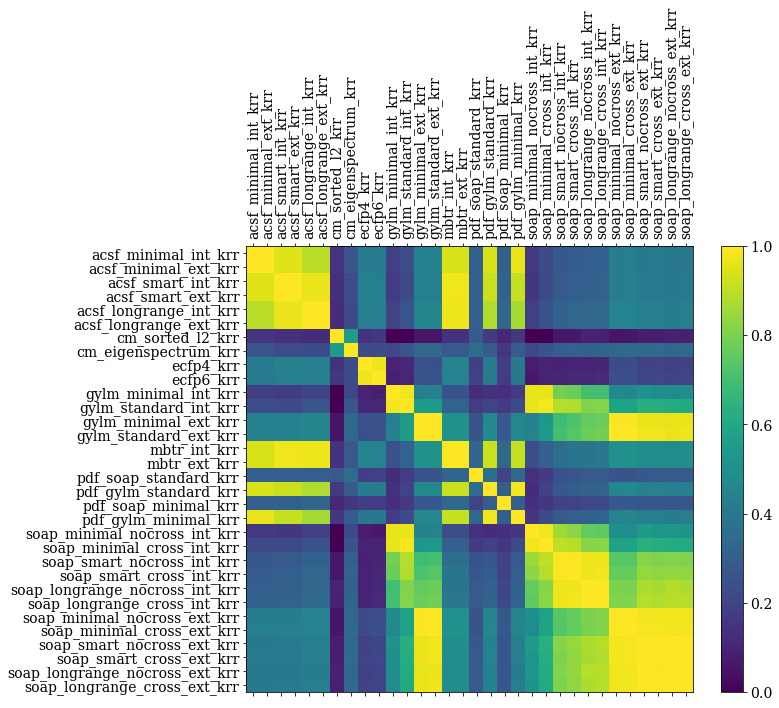

In [137]:
f = plt.figure(figsize=(10, 8))
plt.matshow(desc_kmat, fignum=f.number,vmin=None, vmax=None)

annotate = list([ x[5:] for x in desc_names])
plt.xticks(range(desc_kmat.shape[1]), annotate, fontsize=14, rotation=90)
plt.yticks(range(desc_kmat.shape[1]), annotate, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Descriptor Correlation Matrix', fontsize=16);

In [138]:
reduce_dict2 = {}
reduce_dict2['kpca'] = {"type": 'SPARSE_KPCA',
                        'parameter':{"n_components": 10,
                                     "n_sparse": -1, # no sparsification
                                "kernel": {"first_kernel": {"type": 'linear'}}}}

dreducer2 = Dimension_Reducers(reduce_dict2)
proj = dreducer2.fit_transform(desc_kmat)

Using kernel PCA (sparsified) ...
Not using any sparsification


In [ ]:
fig_spec = { 'outfile': file_prefix+'-descriptor-similarity.pdf',
                'show': False,
                'title': None,
                'size': [12*1.1, 12],
                'xlabel': None, 'ylabel': None,
                            'xaxis': False, 'yaxis': False,
                            'remove_tick': True,
                'cmap': 'viridis',
                    'components':{
                    'first_p': {'type': 'scatter', 'clabel': 'RMSE by model',
                                'vmin':None, 'vmax': None},
                    'second_p': {"type": 'annotate', 'adtext': True} 
                    }
                   }
    
asap_plot = Plotters(fig_spec)
plotcolor = [ lc_by_model[k[5:]][-1,1] for k in desc_names]
annotate = list([ x[5:] for x in desc_names])
#plotcolor = np.arange(len(proj))
asap_plot.plot(proj[:, [0,1]], np.log(plotcolor), [], annotate)

Using scatter plot ...
Using annotation plot ...


In [ ]:
# select out certain components
sub_correlation_matrix = np.ones((len(desc_names),len(desc_names)))
sub_lc_matrix = np.ones((len(desc_names),len(desc_names),2))

for i, desc in enumerate(desc_names):
    index_now = list(by_model.keys()).index(desc)
    for j, desc2 in enumerate(desc_names):
        index_2 = list(by_model.keys()).index(desc2)
        sub_correlation_matrix[i,j] = correlation_matrix[index_now,index_2]
        sub_lc_matrix[i,j] = [ lc_by_model[desc[5:]][-1,1] , lc_by_model[desc2[5:]][-1,1]]
#np.min(sub_correlation_matrix)

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
p1 = ax.scatter(desc_kmat.flatten(),sub_correlation_matrix.flatten(), 
            marker='v', s=100, c=np.log(sub_lc_matrix[:,:,0].flatten()))
ax.scatter(desc_kmat.flatten(),sub_correlation_matrix.flatten(), 
            marker='^', s=100, c=np.log(sub_lc_matrix[:,:,1].flatten()))

cbar = fig.colorbar(p1, orientation="horizontal", pad=0.1)
cbar.set_label('RMSE by model')

desc_ex_best = []

ylimit=[np.min(sub_correlation_matrix),1]
offset = min((np.max(sub_correlation_matrix)-np.min(sub_correlation_matrix))/100., (ylimit[1]-ylimit[0])/100.,)
error_limit = np.percentile(sub_lc_matrix, 20)

for i, desc in enumerate(desc_names):
    for j, desc2 in enumerate(desc_names):
        if i>j and (sub_lc_matrix[i,j,0]<error_limit or sub_lc_matrix[i,j,1]<error_limit): # and desc[-7:-4] != 'ext' and desc2[-7:-4] != 'ext':
            desc_ex_best.append([desc_kmat[i,j],sub_correlation_matrix[i,j]])
            ax.annotate(desc[5:-4],(desc_kmat[i,j],sub_correlation_matrix[i,j]),
                        xytext = (desc_kmat[i,j], offset+sub_correlation_matrix[i,j]))
            ax.annotate(desc2[5:-4],(desc_kmat[i,j],sub_correlation_matrix[i,j]), 
                        xytext = (desc_kmat[i,j], -offset+sub_correlation_matrix[i,j]))
#plt.ylim(ylimit)
ax.set_xlabel("Spearman R for a pair of descriptor kernel matrices of 100 random sample")
ax.set_ylabel("Spearman R for a pair of model predictions")
ax.set_title(prefix, fontsize=16);

plt.savefig(prefix+'-corr-desc-model.pdf')

In [ ]:
get_score(sub_correlation_matrix.flatten(), desc_kmat.flatten())

In [ ]:
get_score(np.array(np.matrix(desc_ex_best)[:,0].flatten())[0],
          np.array(np.matrix(desc_ex_best)[:,1].flatten())[0])

In [ ]:
select_models = []
invRMSE = np.asarray([ np.array([i, 1./lc_by_model[k[5:]][-1,1]]) for i, k in enumerate(desc_names)])
for step in range(4):
    sortedinvRMSE = invRMSE[invRMSE[:,1].argsort()][::-1]
    select = [ int(sortedinvRMSE[0,0]),sortedinvRMSE[0,1] ]
    invRMSE[select[0],1] = 0.0
    #symselected[step] = int(sortedinvRMSE[0,0])
    print(select, desc_names[select[0]])
    select_models.append( desc_names[select[0]])
    for index in range(len(desc_names)):
        invRMSE[index,1] *= (1.-abs(desc_kmat[select[0],index]))

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
lc_by_model = {}
lc_by_model_train = {}
sc_name='RMSE'

i=0
for category, model_key in bmol.items():
    #print(category, model_key)
    best_error = 10**20.
    best_model = None
    for key_now in model_key:
        lc_by_model[key_now], lc_by_model_train[key_now], _ = get_learning_curve(by_model, model_key_now='bmol_'+key_now, 
                                                       sc_name=sc_name)
        #ax.errorbar(lc_by_model_train[key_now][:,0], lc_by_model_train[key_now][:,1], yerr=lc_by_model_train[key_now][:,2],
        #            linestyle='--', c=cm.tab10(i), alpha=0.5,
        #            uplims=True, lolims=True)
        ax.errorbar(lc_by_model[key_now][:,0], lc_by_model[key_now][:,1], yerr=lc_by_model[key_now][:,2],
                    linestyle='-', c=cm.tab10(i), alpha=0.5,
                    uplims=True, lolims=True)
        if np.mean(lc_by_model[key_now][:,1]) < best_error:
            best_error, best_model = np.mean(lc_by_model[key_now][:,1]), key_now
    ax.errorbar(lc_by_model[best_model][:,0], lc_by_model[best_model][:,1], yerr=lc_by_model[best_model][:,2],
                linestyle='-',linewidth=4, c=cm.tab10(i), alpha=1.0, label=best_model,
                uplims=True, lolims=True)    
    i+=1

lc_hybrid = fit_hybrid_lc(by_model, all_model_keys, alpha=0.001)
ax.errorbar(lc_hybrid[:,0], lc_hybrid[:,1], yerr=lc_hybrid[:,2],
                linestyle='-',linewidth=4, c='black', alpha=1.0, label="Hybrid",
                uplims=True, lolims=True) 

lc_hybrid = fit_hybrid_lc(by_model, select_models, alpha=0.001)
ax.errorbar(lc_hybrid[:,0], lc_hybrid[:,1], yerr=lc_hybrid[:,2],
                linestyle='--',linewidth=4, c='black', alpha=1.0, label="Hybrid",
                uplims=True, lolims=True) 

ax.legend(loc='best') # bbox_to_anchor=(1.3, 0.5))
ax.set_title('Learning curve for the dataset '+prefix)
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Test {}'.format(sc_name))

#plt.ylim([0.1,0.7])
ax.set_xscale('log')
ax.set_yscale('log')

fig.savefig(file_prefix+'-lc.pdf')